## Lab 1

# Boston housing

### Integrante 1: Diego Lepe Lozano
### Integrante 2: Othón Escandón Azpeitia
<br><br>

### Data set info:

There are 14 attributes in each case of the dataset. They are:
- **CRIM** - per capita crime rate by town
- **ZN** - proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS** - proportion of non-retail business acres per town.
- **CHAS** - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- **NOX** - nitric oxides concentration (parts per 10 million)
- **RM** - average number of rooms per dwelling
- **AGE** - proportion of owner-occupied units built prior to 1940
- **DIS** - weighted distances to five Boston employment centres
- **RAD** - index of accessibility to radial highways
- **TAX** - full-value property-tax rate per \$10,000
- **PTRATIO** - pupil-teacher ratio by town
- **B** - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- **LSTAT** - % lower status of the population
- **MEDV** - Median value of owner-occupied homes in \$1000's


## Questionnaire

During this notebook well be answering this questions. 

1. Download the Boston Housing Data from Kaggle at: 
https://www.kaggle.com/altavish/boston-housing-dataset <br>
    How many rows are in this data set? How many columns? What do the rows and columns represent?<br>

2. Make some pairwise scatterplots of the predictors (columns) in this data set. Describe your findings.

3. Are any of the predictors associated with per capita crime rate? If so, explain the relationship.

4. Do any of the suburbs of Boston appear to have particularly high crime rates? Tax rates? Pupil-teacher ratios?

5. How many of the suburbs in this data set bound the Charles River?

6. What is the median pupil-teacher ratio among the towns in this data set?

7. Which suburb of Boston has lowest median value of owner-occupied homes? What are the values of the other predictors for that suburb, and how do those values compare to the overall ranges for those predictors? Comment on your findings.

8. In this data set, how many of the suburbs average more than seven rooms per dwelling? More than eight rooms per dwelling? Comment on the suburbs that average more than eight rooms per dwelling.

9. Split the data in training (70%) and test (30%) data, use the linear regression model with the training data, and test it to predict House value. How well did the model perform? How can you improve these results?

10. We will now try to predict per capita crime rate using the other variables in this data set. In other words, per capita crime rate is the response, and the other variables are the predictors. For each predictor, individually, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions.

11. Fit a multiple regression model to predict the response using all the predictors. Describe your results. For which predictors can we get the best results? Which predictors can be eliminated?

12. How do your results from j) compare to your results from k)?



### Import main modules



In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

## Loading dataset

In [3]:
df = pd.read_csv("HousingData.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
# statistical info
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


> ### Q&A 
> How many rows are in this data set? How many columns? 
> - We can see that the dataset consists of 506 entries and 14 columns
>
> What do the rows and columns represent?
> - Each row represents an entry (a suburb) and the columns represent observations that can be used as predictors

## Preprocessing dataset

In [6]:
# check for null values
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

### Normilize NaN, NA and NULL values

In [7]:
df = df.fillna(0)

# check for null values again
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### Exploraty Data Analysis

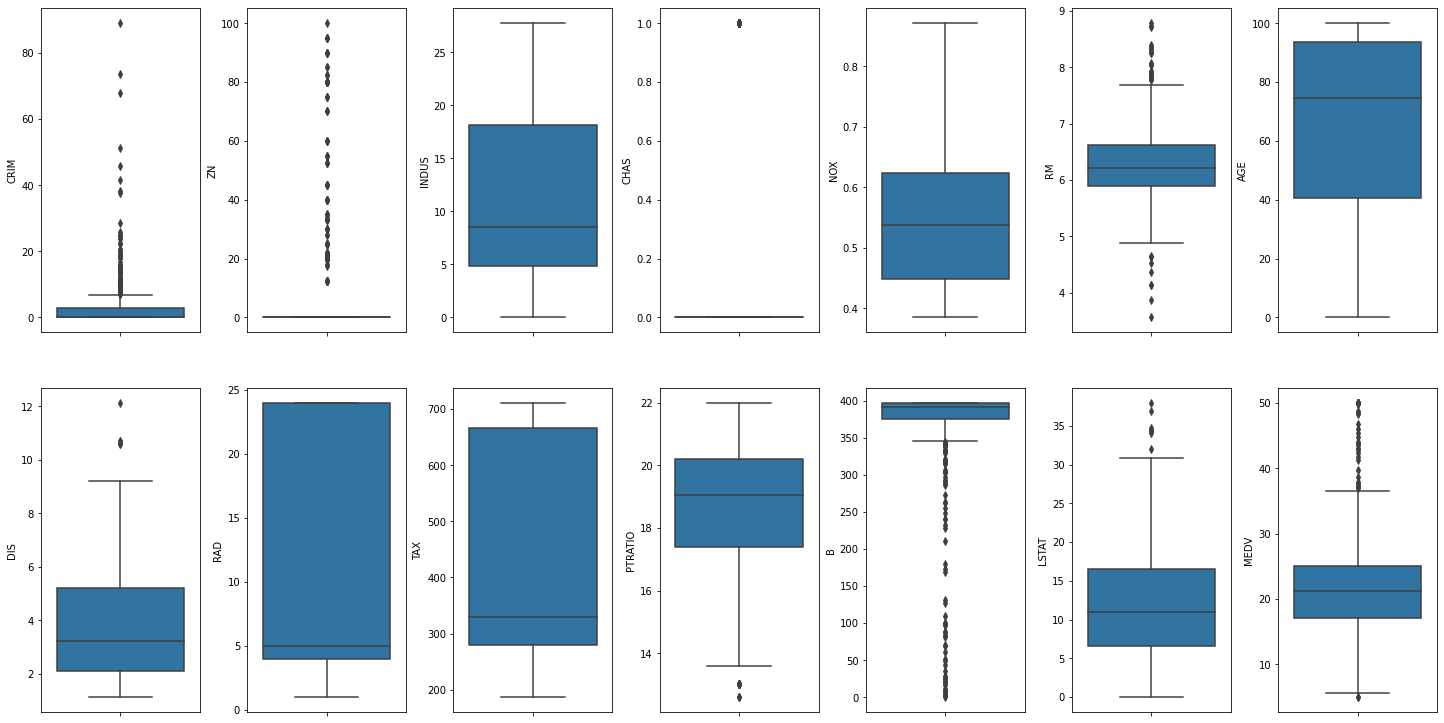

In [8]:
# create box plots
fig, ax =plt.subplots(ncols=7, nrows=2, figsize=(20,10))

index = 0
ax = ax.flatten()

for index, (col, value) in enumerate(df.items()):
    sns.boxplot(y=col, data=df, ax=ax[index])

plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

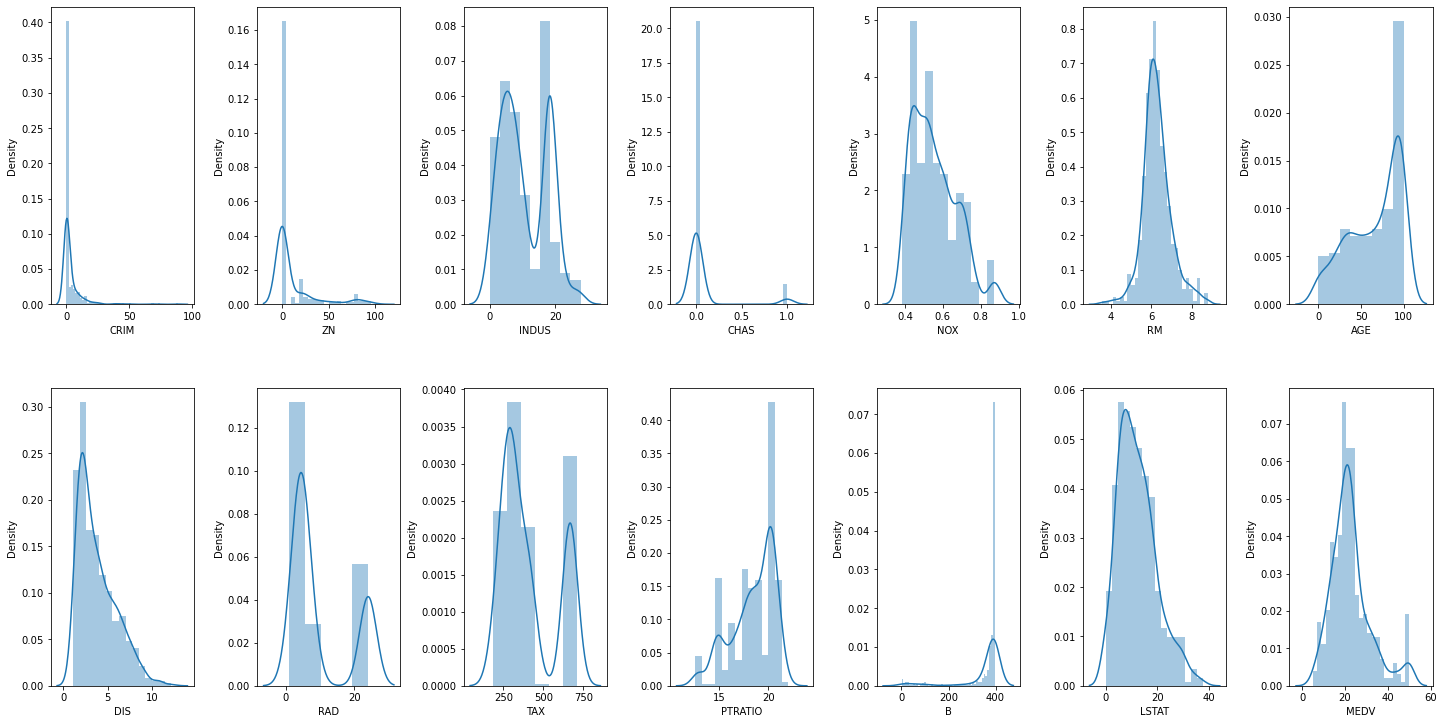

In [9]:
# create dist plots
fig, ax =plt.subplots(ncols=7, nrows=2, figsize=(20,10))

index = 0
ax = ax.flatten()

for index, (col, value) in enumerate(df.items()):
    sns.distplot(value, ax=ax[index])

plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

> ### Q&A 
> 4. Do any of the suburbs of Boston appear to have particularly high crime rates? Tax rates? Pupil-teacher ratios? <br> 
> - There are definitely high crime rate in some of the suburbs but not all
> - Most of the data shows that the majority of taxes rates are between 200-480
> - Pupil-teacher ratio variates from 10 to 25 being around the 20 the most popular

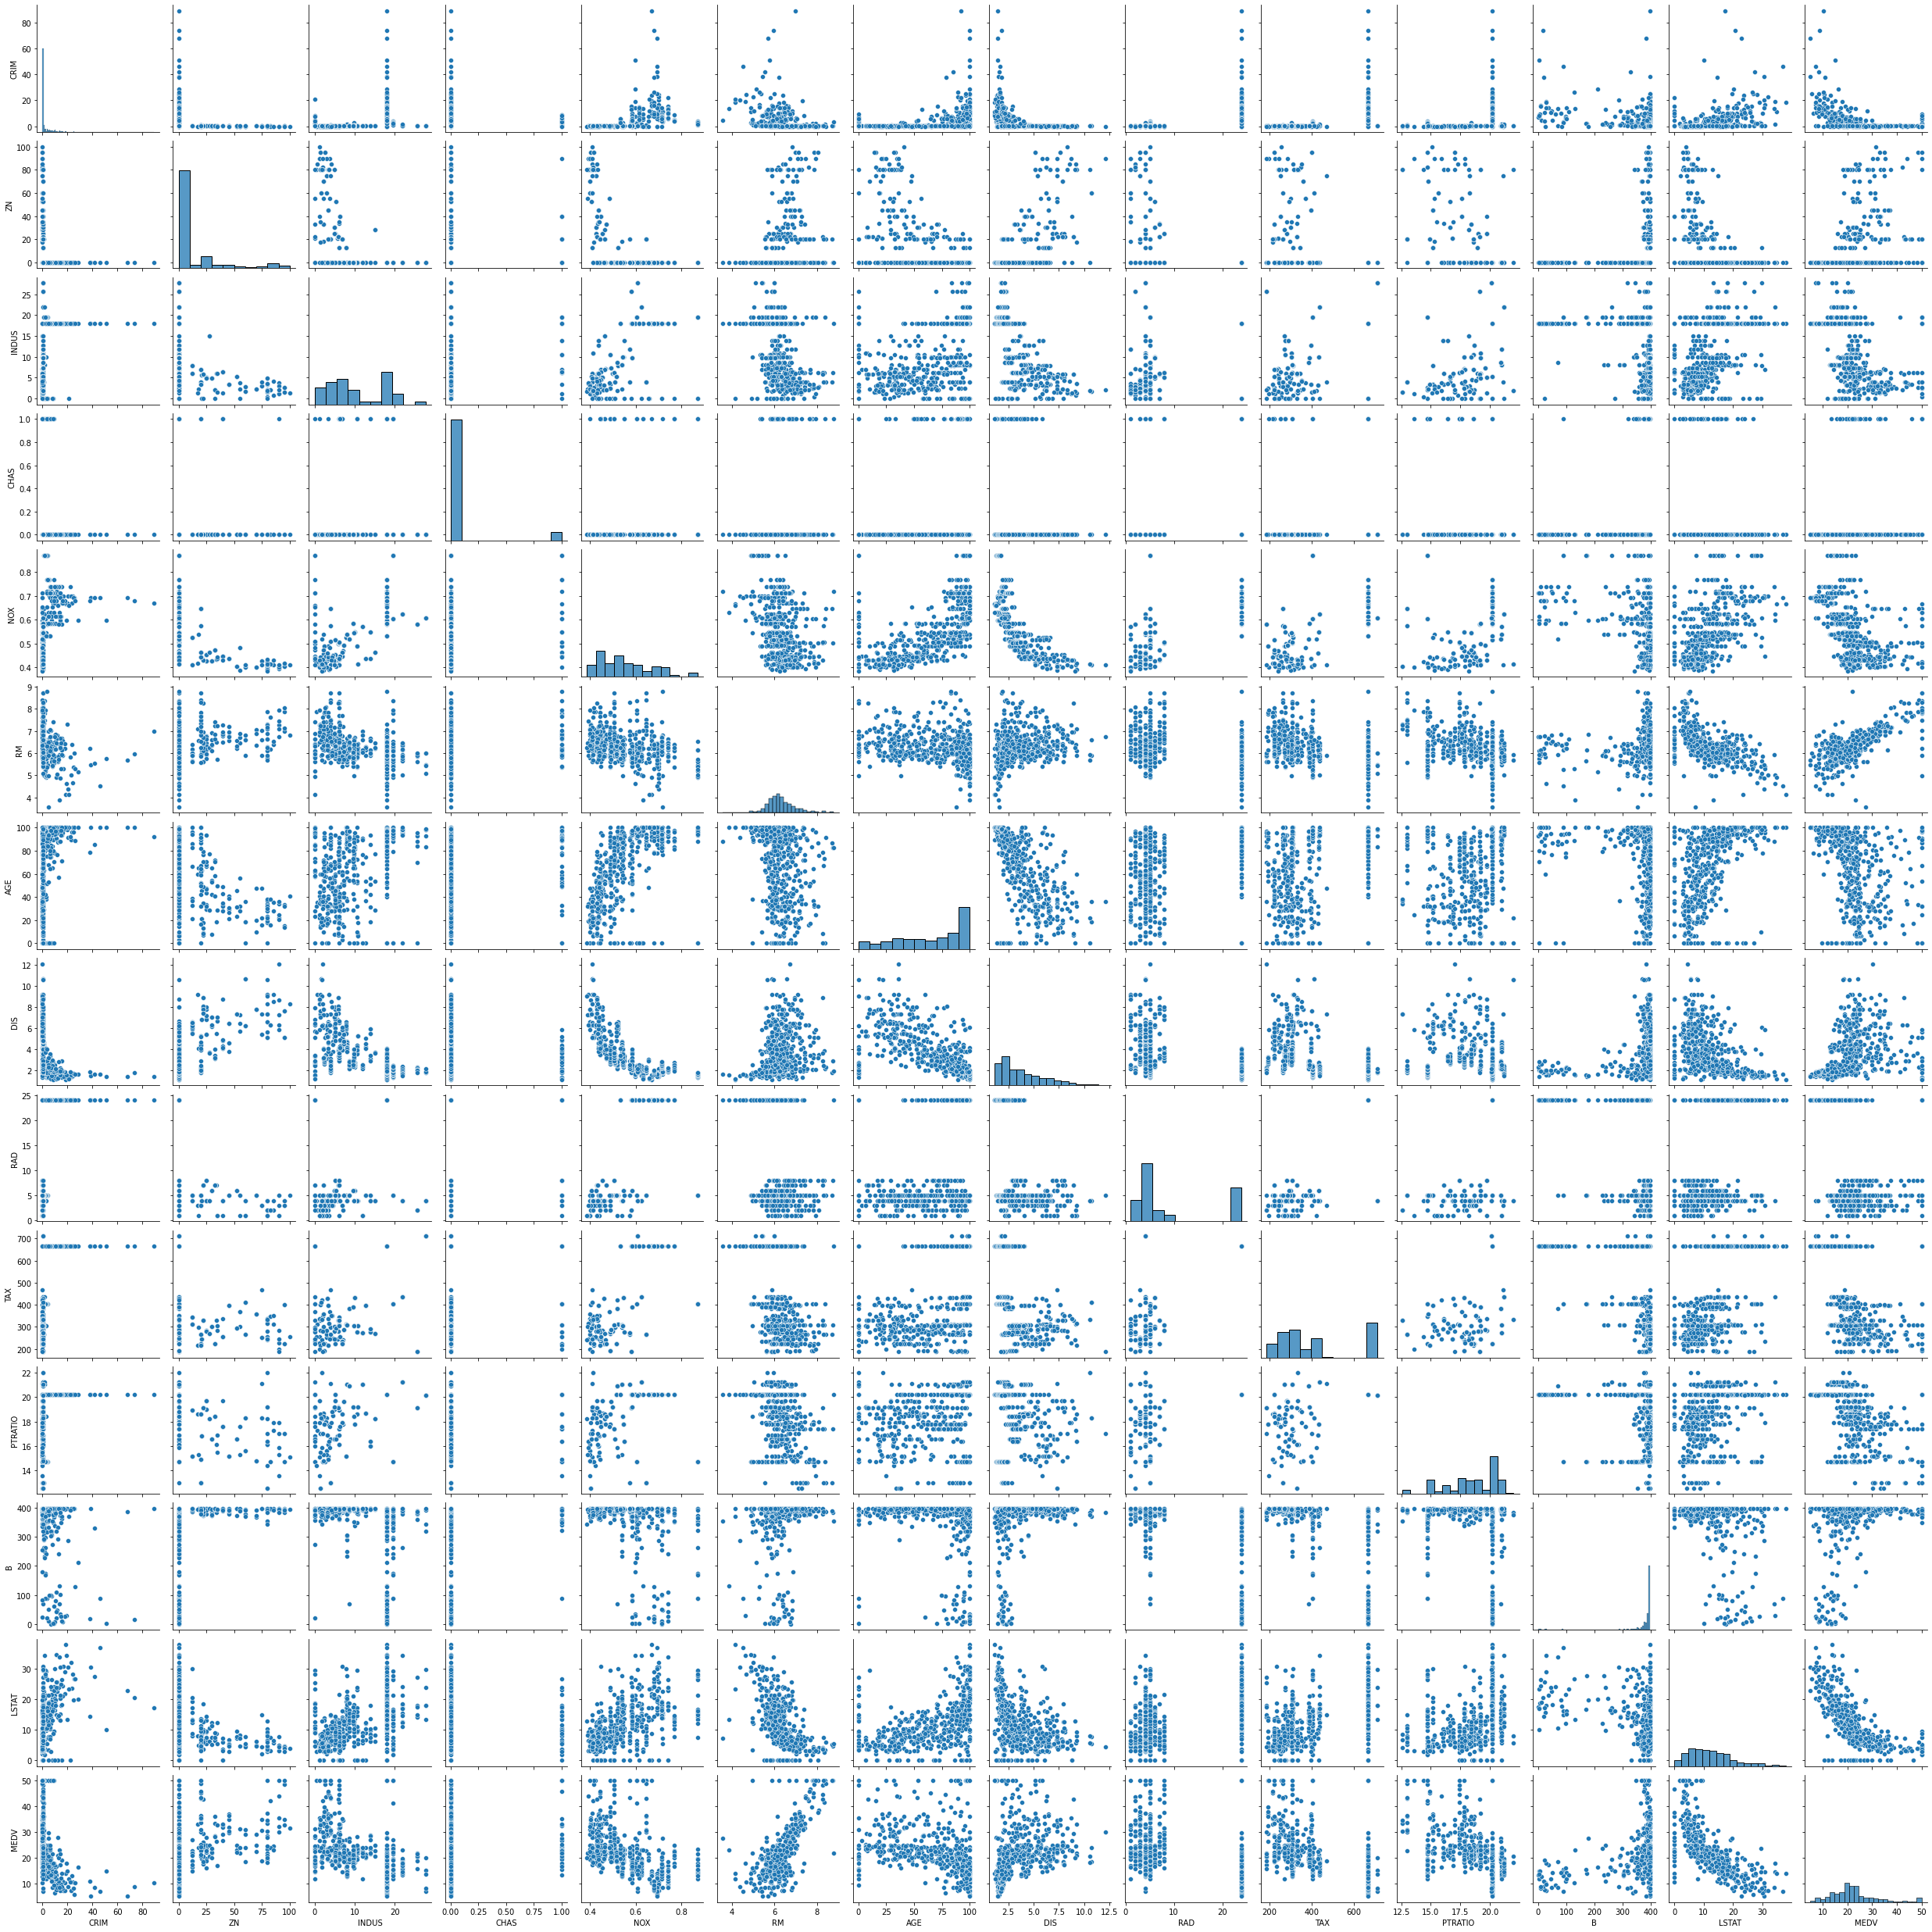

In [10]:
# create pair plots

sns.pairplot(df,kind="scatter")


> ### Q&A 
> 2. Make some pairwise scatterplots of the predictors (columns) in this data set. Describe your findings. <br>
> - Honestly I don't get much info with this scatter plot. They don't even show clearly if there is or not any kind of correlation 

In [11]:
df['CHAS'].sum(min_count=1)

34.0

> ### Q&A 
> 5. How many of the suburbs in this data set bound the Charles River?<br>
> - There are 34 suburbs bound to the river

In [12]:
df['PTRATIO'].median()

19.05

> ### Q&A 
> 6. What is the median pupil-teacher ratio among the towns in this data set?
> - The median is 19.05

In [13]:
df[df.MEDV == df['MEDV'].min()]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
398,38.3518,0.0,18.1,0.0,0.693,5.453,100.0,1.4896,24,666,20.2,396.90,30.59,5.0
405,67.9208,0.0,18.1,0.0,0.693,5.683,100.0,1.4254,24,666,20.2,384.97,22.98,5.0


> ### Q&A 
> 7. Which suburb of Boston has lowest median value of owner-occupied homes? What are the values of the other predictors for that suburb, and how do those values compare to the overall ranges for those predictors? Comment on your findings.<br>
> - Has a high crime index, the ZN residential land is under 25,000ft^2, not bounding to the Charles River, High Nitrogen oxides, average pupil teacher ratio

In [14]:
df[df.RM > 7].count()[0]

64

In [15]:
print(df[df.RM > 8].count()[0])
df[df.RM > 8].describe()

13


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,0.678785,13.615385,7.078462,0.153846,0.539238,8.348538,58.900000,3.430192,7.461538,325.076923,16.361538,385.210769,4.069231,44.200000
std,0.922489,26.298094,5.392767,0.375534,0.092352,0.251261,35.266533,1.883955,5.332532,110.971063,2.410580,10.529359,1.804400,8.092383
min,0.000000,0.000000,2.680000,0.000000,0.416100,8.034000,0.000000,1.801000,2.000000,224.000000,13.000000,354.550000,0.000000,21.900000
25%,0.315330,0.000000,3.970000,0.000000,0.504000,8.247000,31.900000,2.288500,5.000000,264.000000,14.700000,384.540000,3.320000,41.700000
50%,0.382140,0.000000,6.200000,0.000000,0.507000,8.297000,76.000000,2.894400,7.000000,307.000000,17.400000,386.860000,4.140000,48.300000
75%,0.578340,20.000000,6.200000,0.000000,0.605000,8.398000,83.000000,3.651900,8.000000,307.000000,17.400000,389.700000,5.120000,50.000000
max,3.474280,95.000000,19.580000,1.000000,0.718000,8.780000,91.500000,8.906700,24.000000,666.000000,20.200000,396.900000,7.440000,50.000000


> ### Q&A 
> 8. In this data set, how many of the suburbs average more than seven rooms per dwelling? More than eight rooms per dwelling? Comment on the suburbs that average more than eight rooms per dwelling.<br>
> - The 8+ rooms: Have some of the lowest crime rates, lowest Nitrogen Oxen rates, some of the best  p-teacher ratios…

### Min-Max Normalization

In [16]:
cols = ['CRIM', 'ZN', 'TAX', 'B']

for col in cols:
    minimum = min(df[col])
    maximum = max(df[col])
    df[col] = (df[col] - minimum) / (maximum - minimum)

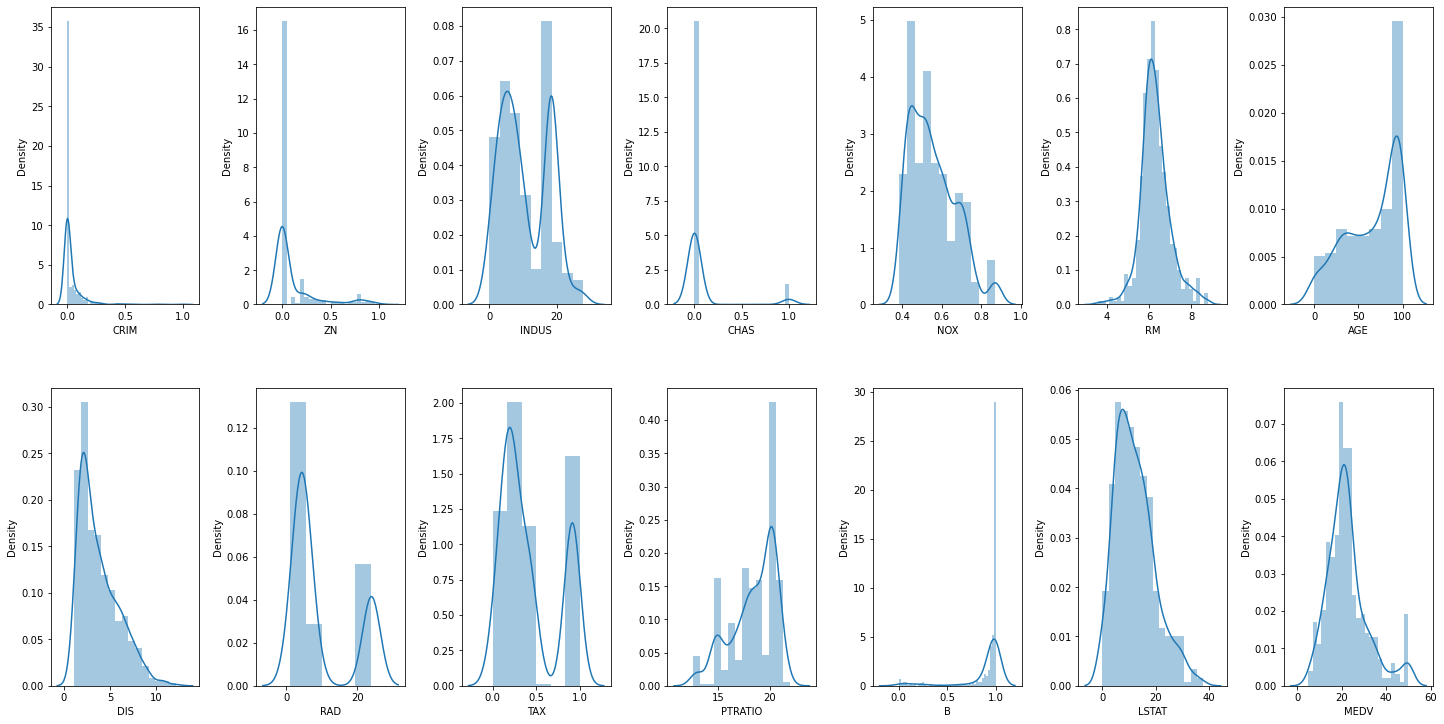

In [17]:
# create dist plots
fig, ax =plt.subplots(ncols=7, nrows=2, figsize=(20,10))

index = 0
ax = ax.flatten()

for index, (col, value) in enumerate(df.items()):
    sns.distplot(value, ax=ax[index])

plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [18]:
# standarization
from sklearn import preprocessing
scalar = preprocessing.StandardScaler()

# fit our data
scaled_cols = scalar.fit_transform(df[cols])
scaled_cols = pd.DataFrame(scaled_cols,columns=cols)
scaled_cols.head()



,CRIM,ZN,TAX,B
0,-0.404235,0.314369,-0.666608,0.441052
1,-0.401785,-0.468160,-0.987329,0.441052
2,-0.401787,-0.468160,-0.987329,0.396427
3,-0.401194,-0.468160,-1.106115,0.416163
4,-0.396912,-0.468160,-1.106115,0.441052


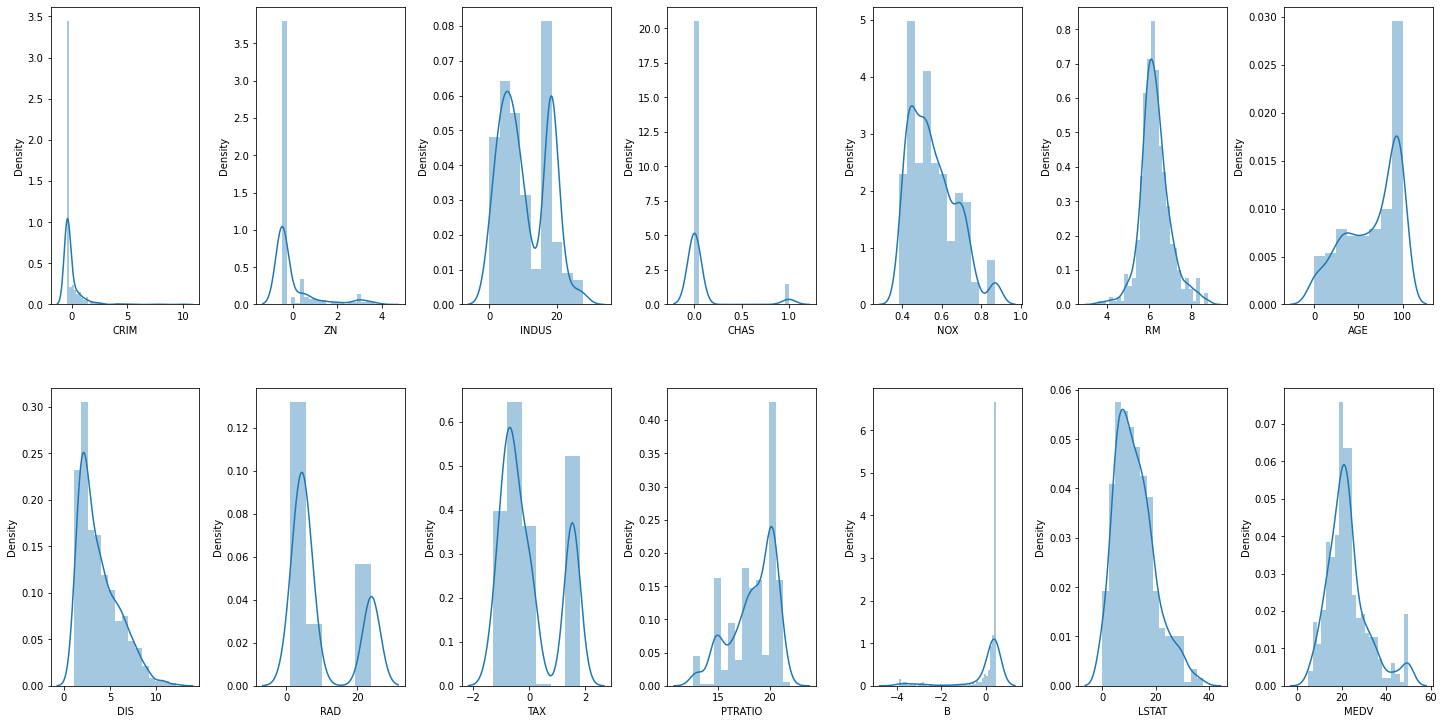

In [19]:
for col in cols:
    df[col] = scaled_cols[col]

# create dist plots
fig, ax =plt.subplots(ncols=7, nrows=2, figsize=(20,10))

index = 0
ax = ax.flatten()

for index, (col, value) in enumerate(df.items()):
    sns.distplot(value, ax=ax[index])

plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

### Correlation Matrix

<AxesSubplot:>

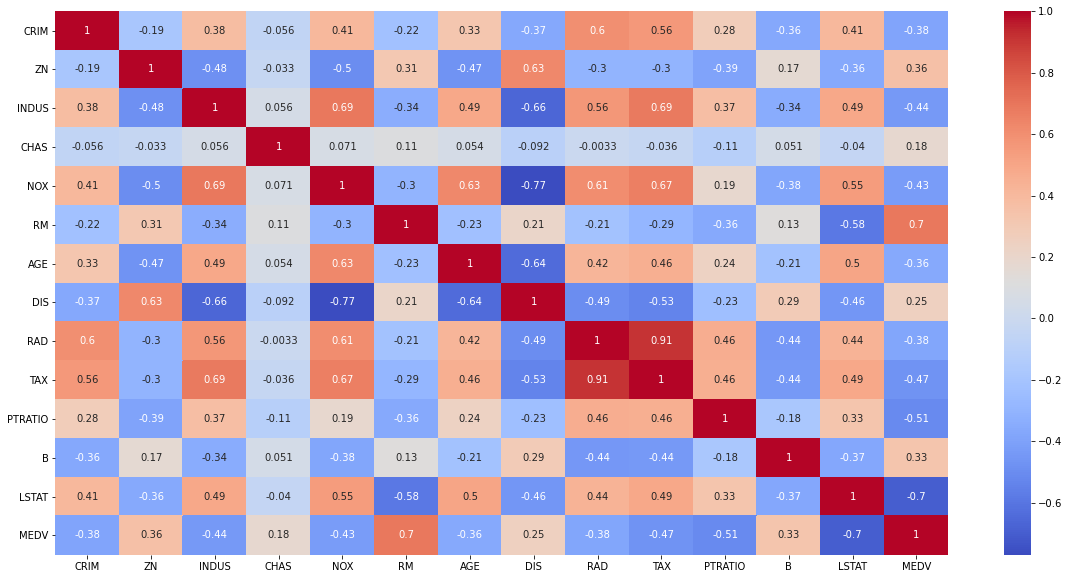

In [20]:
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

> ### Q&A 
> 3. Are any of the predictors associated with per capita crime rate? If so, explain the relationship.<br>
> - It appears to be a correlation with crime on some of the predictors looking at the correlation matrix also the heat map helps us to see those correlations
> 

<AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>

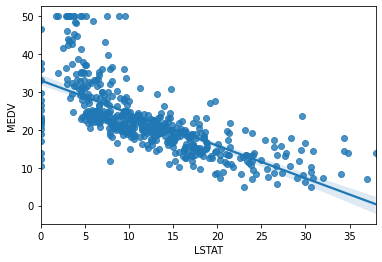

In [21]:
sns.regplot(y=df['MEDV'], x=df['LSTAT'])

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

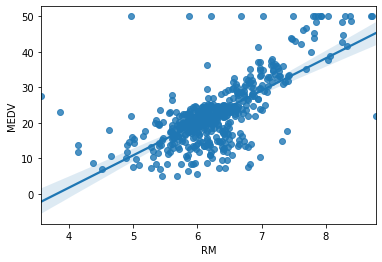

In [22]:
sns.regplot(y=df['MEDV'], x=df['RM'])

X = df.drop(columns=['medv','rad'

In [23]:
x = df.drop(columns=['MEDV','RAD'], axis=1)
y = df['MEDV']

## Model Training

In [24]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

def train(model, x, y):
    #train the model
    x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42)
    model.fit(x_train, y_train)
    
    pred = model.predict(x_test)
    
    cv_score =cross_val_score(model, x, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    
    
    print("Model Report:")
    print("MSE", mean_squared_error(y_test,pred))
    print("CV Score:", cv_score)


Model Report:
MSE 24.551492874893025
CV Score: 35.624266694929055


<AxesSubplot:title={'center':'Model Coefficients'}>

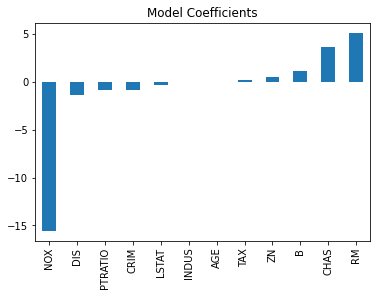

In [25]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(normalize=True)
train(model, x, y)
coef = pd.Series(model.coef_, x.columns).sort_values()
coef.plot(kind='bar',title='Model Coefficients')

Model Report:
MSE 16.940472440944887
CV Score: 40.47193612890701


<AxesSubplot:title={'center':'Feature Importance'}>

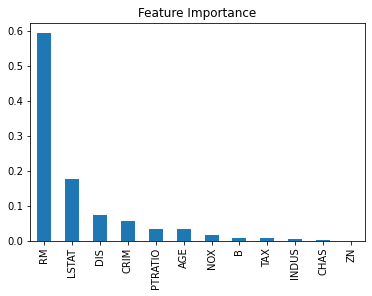

In [26]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model, x, y)
coef = pd.Series(model.feature_importances_, x.columns).sort_values(ascending=False)
coef.plot(kind='bar',title='Feature Importance')

Model Report:
MSE 8.908521015748041
CV Score: 21.144627858784688


<AxesSubplot:title={'center':'Feature Importance'}>

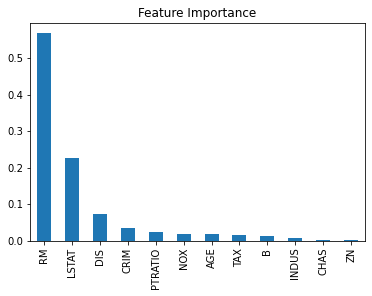

In [27]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
train(model, x, y)
coef = pd.Series(model.feature_importances_, x.columns).sort_values(ascending=False)
coef.plot(kind='bar',title='Feature Importance')

Model Report:
MSE 11.161023480314963
CV Score: 20.77424589798097


<AxesSubplot:title={'center':'Feature Importance'}>

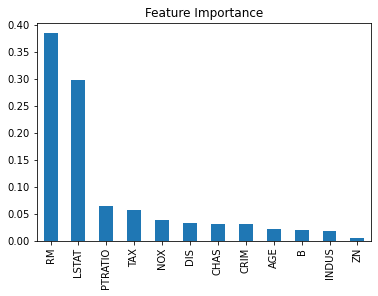

In [28]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
train(model, x, y)
coef = pd.Series(model.feature_importances_, x.columns).sort_values(ascending=False)
coef.plot(kind='bar',title='Feature Importance')

Model Report:
MSE 8.35922686696423
CV Score: 22.734017993140675


<AxesSubplot:title={'center':'Feature Importance'}>

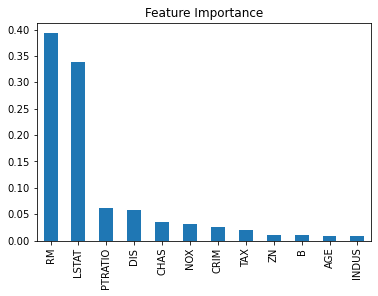

In [29]:
import xgboost as xgb
model =xgb.XGBRegressor()
train(model, x, y)
coef = pd.Series(model.feature_importances_, x.columns).sort_values(ascending=False)
coef.plot(kind='bar',title='Feature Importance')


#### Lets change the training percentages

In [30]:
def trainNtest(model, x, y, test_size):
    #train the model
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = test_size/100 , random_state=42)
    model.fit(x_train, y_train)
    
    pred = model.predict(x_test)
    
    cv_score =cross_val_score(model, x, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    
    
    print("Model Report:")
    print("MSE", mean_squared_error(y_test,pred))
    print("CV Score:", cv_score)


Model Report:
MSE 24.230906625761776
CV Score: 35.624266694929055


<AxesSubplot:title={'center':'Model Coefficients'}>

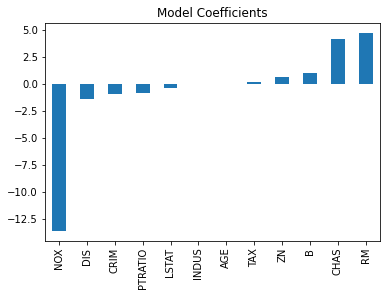

In [31]:
model = LinearRegression(normalize=True)
trainNtest(model, x, y, test_size=30)
coef = pd.Series(model.coef_, x.columns).sort_values()
coef.plot(kind='bar',title='Model Coefficients')

Model Report:
MSE 9.334360480604076
CV Score: 22.734017993140675


<AxesSubplot:title={'center':'Feature Importance'}>

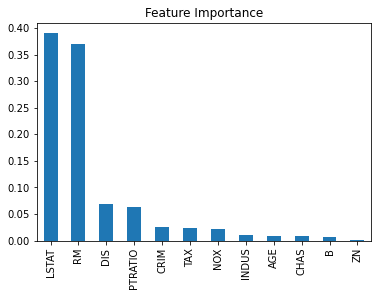

In [32]:
model =xgb.XGBRegressor()
trainNtest(model, x, y, test_size=30)
coef = pd.Series(model.feature_importances_, x.columns).sort_values(ascending=False)
coef.plot(kind='bar',title='Feature Importance')


> ### Q&A 
> 9. Split the data in training (70%) and test (30%) data, use the linear regression model with the training data, and test it to predict House value. How well did the model perform? How can you improve these results?<br>
> - When splitting the dataset into 70% training and 30% for testing, we don't see big changes because the training splitting as default is 75/25. 
> 

#### Let's try to predict other variables


In [33]:
x = df.drop(columns=['CRIM','RAD'], axis=1)
y = df['CRIM']

Model Report:
MSE 0.7578617553328988
CV Score: 0.7754504808114149


<AxesSubplot:title={'center':'Model Coefficients'}>

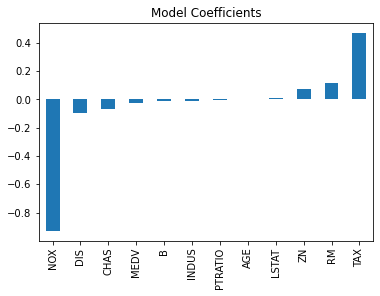

In [34]:
model = LinearRegression(normalize=True)
train(model, x, y)
coef = pd.Series(model.coef_, x.columns).sort_values()
coef.plot(kind='bar',title='Model Coefficients')

Model Report:
MSE 1.2072298938800012
CV Score: 2.931700323802367


<AxesSubplot:title={'center':'Feature Importance'}>

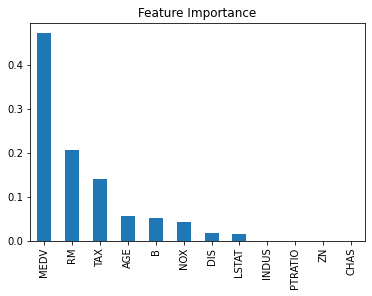

In [35]:
model = DecisionTreeRegressor()
train(model, x, y)
coef = pd.Series(model.feature_importances_, x.columns).sort_values(ascending=False)
coef.plot(kind='bar',title='Feature Importance')

Model Report:
MSE 0.590958035241371
CV Score: 0.616656122022499


<AxesSubplot:title={'center':'Feature Importance'}>

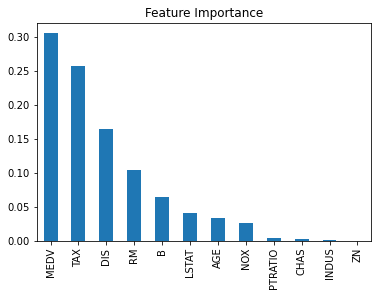

In [36]:
model = RandomForestRegressor()
train(model, x, y)
coef = pd.Series(model.feature_importances_, x.columns).sort_values(ascending=False)
coef.plot(kind='bar',title='Feature Importance')

Model Report:
MSE 0.5472207868734271
CV Score: 0.6946042222675687


<AxesSubplot:title={'center':'Feature Importance'}>

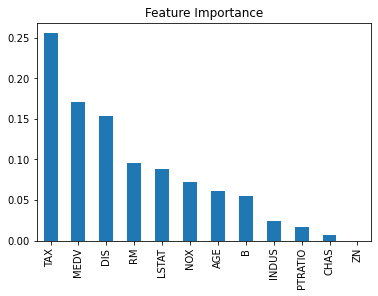

In [37]:
model = ExtraTreesRegressor()
train(model, x, y)
coef = pd.Series(model.feature_importances_, x.columns).sort_values(ascending=False)
coef.plot(kind='bar',title='Feature Importance')

Model Report:
MSE 0.660345951219073
CV Score: 1.084019866021991


<AxesSubplot:title={'center':'Feature Importance'}>

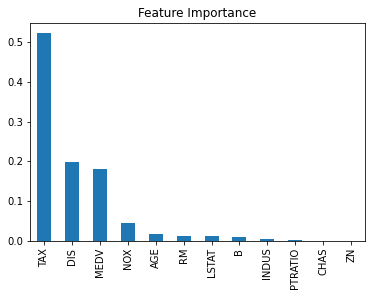

In [38]:
model =xgb.XGBRegressor()
trainNtest(model, x, y, test_size=30)
coef = pd.Series(model.feature_importances_, x.columns).sort_values(ascending=False)
coef.plot(kind='bar',title='Feature Importance')

> ### Q&A 
> 10. We will now try to predict per capita crime rate using the other variables in this data set. In other words, per capita crime rate is the response, and the other variables are the predictors. For each predictor, individually, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions.<br>
> - The model improves the way it predicts drastically for the crime rates instead of the median value
> 

In [39]:
x = df.drop(columns=['MEDV'], axis=1)
y = df['MEDV']

Model Report:
MSE 23.008721077631737
CV Score: 37.6660366090152


<AxesSubplot:title={'center':'Model Coefficients'}>

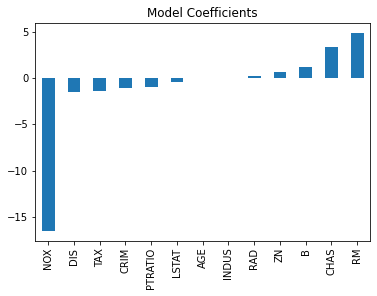

In [40]:
model = LinearRegression(normalize=True)
train(model, x, y)
coef = pd.Series(model.coef_, x.columns).sort_values()
coef.plot(kind='bar',title='Model Coefficients')

Model Report:
MSE 12.06423983464567
CV Score: 21.411010174296237


<AxesSubplot:title={'center':'Feature Importance'}>

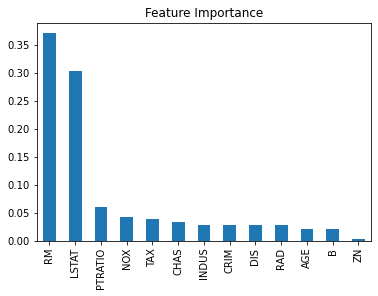

In [41]:
model = ExtraTreesRegressor()
train(model, x, y)
coef = pd.Series(model.feature_importances_, x.columns).sort_values(ascending=False)
coef.plot(kind='bar',title='Feature Importance')

> ### Q&A 
> 11. Fit a multiple regression model to predict the response using all the predictors. Describe your results. For which predictors can we get the best results? Which predictors can be eliminated?<br>
> - The models we used allow us to do the multiple regression. We can and in fact we should eliminate RAD because the models improve with out it. CRIM in the other hand, shouldn't be eliminated because it makes worst the predictions
> 
> 12. How do your results from 10) compare to your results from 11)?
> - In this particular example, they are pretty similar